In [80]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder 
from torch.utils.data import DataLoader,Dataset
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import pandas as pd
from torch.utils.data import TensorDataset, DataLoader
import os

In [81]:
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)
# ---------- Load Training Data ----------
train_path = "/Users/raaghav/Downloads/mnist_png/training"
train_data, train_labels = [], []

for label in os.listdir(train_path):
    folder = os.path.join(train_path, label)
    if not os.path.isdir(folder):   # ✅ skip .DS_Store or files
        continue
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)
        img = Image.open(img_path).convert("L")  
        arr = np.array(img).flatten()   # 784 values
        train_data.append(arr)
        train_labels.append(int(label))

# ---------- Load Testing Data ----------
test_path = "/Users/raaghav/Downloads/mnist_png/testing"
test_data, test_labels = [], []

for label in os.listdir(test_path):
    folder = os.path.join(test_path, label)
    if not os.path.isdir(folder):   # ✅ skip .DS_Store or files
        continue
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)
        img = Image.open(img_path).convert("L")  
        arr = np.array(img).flatten()  
        test_data.append(arr)
        test_labels.append(int(label))






In [82]:
# Convert to numpy arrays
train_data = np.array(train_data) / 255.0   # normalize
train_labels = np.array(train_labels)

test_data = np.array(test_data) / 255.0
test_labels = np.array(test_labels)

In [83]:
#  Convert to PyTorch tensors
X_train = torch.tensor(train_data, dtype=torch.float32)
y_train = torch.tensor(train_labels, dtype=torch.long)

X_test = torch.tensor(test_data, dtype=torch.float32)
y_test = torch.tensor(test_labels, dtype=torch.long)

In [84]:
# Create Datasets and Loaders 
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)#loads the training and testing data in small batches
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [85]:
len(train_loader)

938

In [88]:
import torch.nn.functional as F
#model creation
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()

        # Layer 1(hidden): 128 neurons
        self.fc1 = nn.Linear(784, 128)

        # Layer 2(hidden): 64 neurons
        self.fc2 = nn.Linear(128, 64)
        #Layer 3(hidden): 32 neurons
        self.fc3 = nn.Linear(64,32)

        # Output layer: 10 neurons for 0-9 outputs
        self.fc4 = nn.Linear(32, 10)

    def forward(self, x):
        # ReLU activation for Layer1
        x = F.relu(self.fc1(x))

        # ReLU activation for Layer2
        x = F.relu(self.fc2(x))

        # Pass through final output layer (no activation, CrossEntropyLoss(our loss function) will apply Softmax)
        x = self.fc3(x)
        return x

In [89]:
model = NeuralNet()  
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) #choosing loss function , optimizer and learning rate


In [93]:
epochs = 10  
for epoch in range(epochs):
    model.train()  
    running_loss = 0.0

    for X_batch, y_batch in train_loader:
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1/10, Loss: 0.0115
Epoch 2/10, Loss: 0.0115
Epoch 3/10, Loss: 0.0123
Epoch 4/10, Loss: 0.0088
Epoch 5/10, Loss: 0.0085
Epoch 6/10, Loss: 0.0096
Epoch 7/10, Loss: 0.0087
Epoch 8/10, Loss: 0.0061
Epoch 9/10, Loss: 0.0111
Epoch 10/10, Loss: 0.0060


In [94]:
model.eval()  # set to evaluation mode
correct, total = 0, 0

with torch.no_grad():  
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)  # highest logit = prediction
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 97.70%


Epoch [1/10], Loss: 0.0045, Test Accuracy: 97.67%
Epoch [2/10], Loss: 0.0043, Test Accuracy: 98.15%
Epoch [3/10], Loss: 0.0015, Test Accuracy: 97.69%
Epoch [4/10], Loss: 0.0055, Test Accuracy: 98.00%
Epoch [5/10], Loss: 0.0053, Test Accuracy: 98.13%
Epoch [6/10], Loss: 0.0051, Test Accuracy: 97.62%
Epoch [7/10], Loss: 0.0043, Test Accuracy: 98.06%
Epoch [8/10], Loss: 0.0007, Test Accuracy: 98.18%
Epoch [9/10], Loss: 0.0000, Test Accuracy: 98.26%
Epoch [10/10], Loss: 0.0000, Test Accuracy: 98.31%


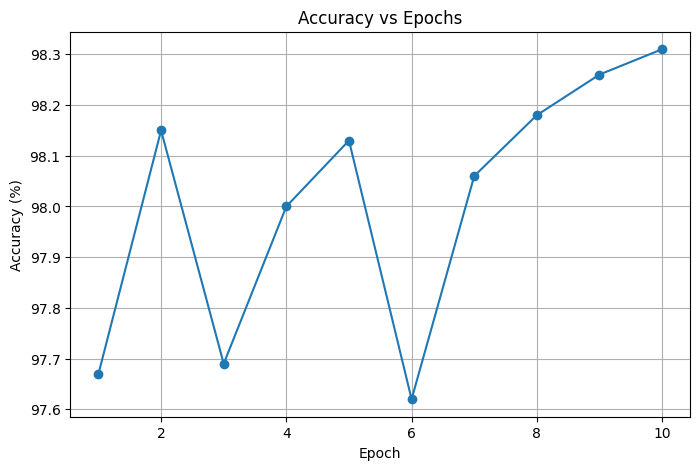

In [98]:
import matplotlib.pyplot as plt

# number of epochs
num_epochs = 10

train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)

    # evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    acc = 100 * correct / total
    test_accuracies.append(acc)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Test Accuracy: {acc:.2f}%")

# plot accuracy vs epoch
plt.figure(figsize=(8,5))
plt.plot(range(1, num_epochs+1), test_accuracies, marker='o', label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs Epochs")

plt.grid(True)
plt.show()
